In [1]:
import time
import random
import math
import array
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pyvisa as visa
import os
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from GrabLocation import grab_location
import config_constants as cc
import cv2
import sys
import usb.core
import usb.util
from Waveform_autotest import auto_test
import smtplib
from email.mime.text import MIMEText

<IPython.core.display.Javascript object>

In [2]:
def send_email(subject, body, sender, recipients, password):
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = ', '.join(recipients)
    smtp_server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtp_server.login(sender, password)
    smtp_server.sendmail(sender, recipients, msg.as_string())
    smtp_server.quit()

In [3]:
freqs = [10]
amps = [4,3.5,3]

#run test for all of the combinations given above
for j in range(0,len(amps)):
    amp = amps[j]
    for i in range(0,len(freqs)):
        freq = freqs[i]
        time = 1.5
        xcoords, ycoords, x0coords, y0coords = auto_test(channel = 2, symm = 0, voltage = amp, freq = freq, duration = time, trials = 25)

        print("Results for",amp,freq,"\/ \/ \/ \/ \/")
        distancex = []
        for i in range(len(x0coords)):
            result = xcoords[i] - x0coords[i]
            distancex.append(result)
        print(distancex)
        distx = np.mean(distancex)*1000
        print(distx)
        
        distancey = []
        for i in range(len(y0coords)):
            result = ycoords[i] - y0coords[i]
            distancey.append(result)
        print(distancey)
        disty = np.mean(distancey)*1000
        print(disty)
        
        thetax = np.arctan(np.mean(distancey)/np.mean(distancex))*180/np.pi
        print(thetax)
        thetay = np.arctan(np.mean(distancex)/np.mean(distancey))*180/np.pi
        print(thetay)
        
        dict = {'Freq': [freq], 'Amp': [amp], 'Time': [time], 'Dist x': [distx], 'Dist y': [disty], 'Angle x': [thetax], 'Angle y': [thetay]}
        df = pd.DataFrame(dict)
        df.to_csv('.\Results\Cache.csv', mode='a', index=False, header=False)
        
#send an email when the test is complete
subject = "AutoTest complete!"
body = "This is a notification that your test sequence has concluded :)"
sender = "3214lab@gmail.com"
password = "ebdzhrzhhpysfpjb"
recipients = ["rsebok@umich.edu"]

send_email(subject, body, sender, recipients, password)

<IPython.core.display.Javascript object>

-0.2067673645019532 1.2975553741455084
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.1775297651806451 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1
-0.20978746032714923 2.0455709686279295
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8563529159092949 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2
-0.11948327636718759 2.211538909912109
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0069686004665535 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

3
-0.10683984375000044 2.2726537933349604
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0624302753668204 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

4
-0.10867776489257785 2.230826782226563
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0244723187739355 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

5
-0.11731805419921848 2.2495378723144537
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.04145260798277 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

6
-0.121870513916015 2.2310465087890616
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0246717203352858 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

7
-0.12823228454589852 2.2395323028564444
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0323725670926867 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

8
-0.13437089538574298 2.1544191589355464
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9551325029135664 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

9
-0.13944749450683602 2.2998049011230464
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.087069869341107 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

10
-0.15603227233886763 2.317682861328125
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.103294094296484 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

11
-0.167899795532227 2.146262954711913
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9477307584981922 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

12
-0.17102975463867232 2.310843872070313
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0970877206994207 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

13
-0.17887696838378986 2.215690826416015
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.010736459136256 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

14
-0.18551110839843687 2.1655851593017577
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9652656332995357 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

15
-0.1905980072021478 2.1897985687255854
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9872392699405454 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

16
-0.18614625549316344 2.239364074707032
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0322199002722785 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

17
-0.17976388549804767 2.1586591949462886
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9589803299177702 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

18
-0.17157449340820285 2.2388479461669917
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0317515143130613 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

19
-0.18120812988281187 2.1758115997314444
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9745461143007672 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

20
-0.1872036895751954 2.2765608062744143
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0659758843796014 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

21
-0.20092515563964852 2.232710479736328
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0261817717426043 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

22
-0.19201593017578134 2.1855047454833976
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9833426310958022 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

23
-0.19580850219726642 2.230888580322265
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.0245284004630646 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

24
-0.21442803955078205 2.2527227630615236
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 2.044342892072567 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 4 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 4 10 \/ \/ \/ \/ \/
[0.029937744140625, 0.00386810302734375, -0.008979034423827414, 0.004807662963866477, 0.016981887817381747, 0.015617752075193891, 0.0221099853515625, 0.007844924926757812, 0.0058319091796867895, 0.0049026489257819605, 0.0019123077392588783, 0.006283950805665128, 0.009014511108398793, 0.007451248168944602, 0.010305404663085938, 0.009710311889648438, 0.006306838989258878, 0.012850570678709872, 0.01173477172851456, 0.019449234008789062, 0.021985244750975852, 0.01593017578125, 0.016241455078125355, 0.027715301513673296, 0.016381072998047586]
11.84783935546875
[-2.3806400299072266, -2.5282630920410156, -2.639038467407227, -2.5463573455810558, -2.626384735107422, -2.591127777099608, -2.625121307373046, -2.5390880584716786, -2.623637008666991, -2.629386520385742, -2.5571353912353505, -2.612742233276368, -2.5296363830566406, -2.559643936157226, -2.505495071411133, -2.525523376464845, -2.5172367095947266, -2.5325466156005856, -2.526852035

<IPython.core.display.Javascript object>

-0.12453126525878844 2.1940992584228507
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9911421400840803 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1
-0.12576722717285094 1.9764452209472658
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7936213924180897 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2
-0.13011598205566344 2.1199415435791007
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.9238441131279669 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

3
-0.13302507019042942 1.8657030334472662
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.6931230054969608 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

4
-0.13838433837890562 1.9965387573242186
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8118562497837598 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

5
-0.13780183410644575 1.8761961212158198
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7026454686012902 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

6
-0.13895768737793013 1.8993532409667964
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.723660523778095 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

7
-0.13873567199707004 1.8986128082275382
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7229885820583322 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

8
-0.14544419860839852 2.0163381805419913
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8298241998511622 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

9
-0.14955834960937509 1.8925050964355474
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7174458417826426 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

10
-0.1503605804443353 1.93164389038086
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.752964244898369 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

11
-0.15821466064453205 1.937454055786132
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7582369622263954 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

12
-0.1671215972900395 1.9503355255126955
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7699268787606248 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

13
-0.1780804595947263 1.9332128753662108
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7543880966723935 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

14
-0.17984284973144504 1.9595937957763674
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.778328746632152 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

15
-0.1842465362548822 2.037236236572266
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8487891577253235 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

16
-0.1938870391845704 2.060651992797851
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8700389251566352 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

17
-0.19723100280761763 2.055433486938476
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8653031380745382 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

18
-0.1948483428955079 1.9664156188964839
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7845195419822346 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

19
-0.19548234558105548 1.9677133789062502
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7856972574539671 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

20
-0.19827470397949298 1.9558424224853521
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7749243803919958 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

21
-0.19752969360351535 2.0201307525634764
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.8332659538840728 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

22
-0.2011757812500008 1.9021478881835936
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7261966623865341 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

23
-0.19682130432128986 1.9298906555175783
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.751373186606752 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

24
-0.1971898040771478 1.9439256896972648
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7641099613380746 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3.5 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 3.5 10 \/ \/ \/ \/ \/
[0.025830459594725852, 0.01569900512695277, 0.0017372131347652697, 0.016178512573240766, 0.002368927001953125, 0.011779403686523082, 0.0044586181640617895, 0.004267501831055398, 0.002025604248046875, 0.01496200561523331, 0.0070312500000007105, 0.009758377075195668, 0.005942916870116832, 0.01165008544921875, 0.010903930664062145, 0.011549377441406605, 0.008877182006836293, 0.0050640106201171875, -0.003401184082029829, 0.0045249938964850855, 0.005941772460937855, 0.002172088623048296, 0.008737564086914062, 0.006264495849608309, 0.018732833862305398]
8.522277832031264
[-2.2203826904296875, -2.358694839477538, -2.2217468261718754, -2.226247787475586, -2.2406856536865227, -2.2376770019531254, -2.2289257049560547, -2.3449653625488267, -2.2327640533447273, -2.2450927734375004, -2.243378448486327, -2.2332904815673835, -2.211153030395508, -2.2336967468261726, -2.3171527862548835, -2.373983001708984, -2.3560958862304684, -2.2589389801025

<IPython.core.display.Javascript object>

-0.20086793518066415 1.9803842773437506
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.7971960808252343 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1
-0.19063806152343687 1.7744249572753912
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.610288273552214 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2
-0.1848416290283197 1.6107835998535158
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4617839607357235 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

3
-0.18815240478515705 1.7015341033935538
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5441399212232663 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

4
-0.18356103515625044 1.664298461914063
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.510348626422788 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

5
-0.18026628112792942 1.6173982849121096
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.467786778572241 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

6
-0.1769600830078133 1.6901952972412104
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5338499698176928 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

7
-0.1751679382324216 1.7226438751220705
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.563297010810188 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

8
-0.1772141418457025 1.6371313323974608
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4856944927513187 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

9
-0.17372941589355406 1.71100180053711
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5527318437079576 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

10
-0.17323274230957075 1.6447908630371089
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.492645506554054 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

11
-0.17264222717285094 1.7796388854980467
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.6150199064351154 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

12
-0.167829986572265 1.586184524536133
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4394603328125497 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

13
-0.16670159912109384 1.7853460540771486
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.6201991542812597 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

14
-0.16607904052734312 1.5962221374511714
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4485694530969946 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

15
-0.16144075012207004 1.6901334991455084
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5337938881285638 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

16
-0.15759896850585875 1.6991491546630861
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.541975583442765 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

17
-0.16188363647460946 1.6638704528808592
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5099602087980717 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

18
-0.15911645507812544 1.6305956115722662
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4797633348509125 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

19
-0.1557095489501954 1.804995559692383
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.6380310543250323 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

20
-0.14826860046386692 1.633590530395507
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4824812196741235 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

21
-0.15069932556152388 1.7336118927001944
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5732504720809801 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

22
-0.14553804016113325 1.699984573364258
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.54273372479582 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

23
-0.1484665832519525 1.6590467681884764
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.5055827213965283 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

24
-0.14992456054687509 1.649866317749023
negX 2.5 Vpp 1 s
Configuring C1
Tiny move done.
posY 2.5 Vpp 1.4972514749113126 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

Y 3 Vpp 1.5 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 3 10 \/ \/ \/ \/ \/
[0.014638137817382102, 0.0017314910888668322, 0.009918594360351918, 0.01350173950195277, 0.0068378448486328125, 0.02012100219726598, 0.009433364868163707, 0.004225158691404829, 0.007098770141601207, 0.0031047821044918322, 0.013109207153320312, 0.004248046874998579, 0.008554458618164062, -0.00135040283203125, 0.0016090393066399145, -0.00254058837890625, 0.010202407836914062, 0.012167358398437855, 0.017121505737303977, -0.000925827026367898, 0.011502456665040128, 0.0022865295410152697, 0.013576126098632457, 0.016676330566406605, 0.026661300659180043]
8.940353393554474
[-2.0079917907714844, -1.9309455871582042, -1.9218887329101548, -1.9297599792480469, -1.9445743560791016, -1.9117778778076175, -2.032825469970703, -1.9200679779052727, -1.9179714202880866, -1.9310325622558597, -1.986592483520507, -1.918466949462891, -2.031615829467773, -1.928122329711913, -1.936828994750977, -1.9875228881835945, -1.9307521820068363, -1.941784286499023

In [4]:
x_steps = np.count_nonzero(xcoords)
steps = list(range(1,x_steps+1))

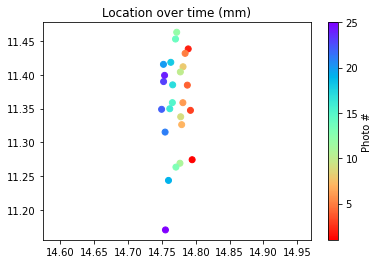

In [5]:
plt.scatter(xcoords,ycoords,c=steps,cmap='rainbow_r')
plt.colorbar(label='Photo #')
plt.title("Location over time (mm)")
plt.axis('equal')
plt.show()

In [6]:
distancex = []
for i in range(len(x0coords)):
    result = xcoords[i] - x0coords[i]
    distancex.append(result)
    
print(distancex)
print(np.mean(distancex)*1000)

[0.014638137817382102, 0.0017314910888668322, 0.009918594360351918, 0.01350173950195277, 0.0068378448486328125, 0.02012100219726598, 0.009433364868163707, 0.004225158691404829, 0.007098770141601207, 0.0031047821044918322, 0.013109207153320312, 0.004248046874998579, 0.008554458618164062, -0.00135040283203125, 0.0016090393066399145, -0.00254058837890625, 0.010202407836914062, 0.012167358398437855, 0.017121505737303977, -0.000925827026367898, 0.011502456665040128, 0.0022865295410152697, 0.013576126098632457, 0.016676330566406605, 0.026661300659180043]
8.940353393554474


In [7]:
distancey = []
for i in range(len(y0coords)):
    result = ycoords[i] - y0coords[i]
    distancey.append(result)
    
print(distancey)
print(np.mean(distancey)*1000)

[-2.0079917907714844, -1.9309455871582042, -1.9218887329101548, -1.9297599792480469, -1.9445743560791016, -1.9117778778076175, -2.032825469970703, -1.9200679779052727, -1.9179714202880866, -1.9310325622558597, -1.986592483520507, -1.918466949462891, -2.031615829467773, -1.928122329711913, -1.936828994750977, -1.9875228881835945, -1.9307521820068363, -1.9417842864990238, -2.0207862854003906, -1.9404464721679684, -1.9324825286865224, -1.9429172515869144, -1.9433601379394538, -1.9596794128417958, -2.0683124542236335]
-1956.7402496337888


In [8]:
thetax = np.arctan(np.mean(distancey)/np.mean(distancex))
print(thetax*180/np.pi)

-89.73821719441665


In [9]:
thetay = np.arctan(np.mean(distancex)/np.mean(distancey))
print(thetay*180/np.pi)

-0.26178280558335604
